# Part II - (Dataset Exploration: Prosper Loan Dataset)
## by (Utianle Helena Kolade)

## Investigation Overview

The main features of interest in this investigation will be the spread of income range of the loan seekers, whether Borrower APR and Borrower Rate has any effect on the loan amount and then a quick look into the correaltions between all the quantititave variables.

## Dataset Overview

The prosper loan dataset is a financial dataset containing 113,937 loans with 81 variables on each loan. The dataset variables include things related to the loan, borrowers, lenders and interest rates.

In [3]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

import os
import requests

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [5]:
# load in the dataset into a pandas dataframe

url = 'https://s3.amazonaws.com/udacity-hosted-downloads/ud651/prosperLoanData.csv'
response = requests.get(url)
with open('prosperLoanData.csv', mode = 'wb') as file:
    file.write(response.content)

df_loan = pd.read_csv('prosperLoanData.csv', header=0)

# Making a copy of original dataset
loan_clean = df_loan.copy()

columns = ['ListingNumber', 'LoanStatus', 'LoanOriginationDate', 'EmploymentStatus', 'Occupation', 'BorrowerRate', 'BorrowerAPR',
           'EmploymentStatusDuration', 'IncomeRange', 'StatedMonthlyIncome', 'IncomeVerifiable', 'IsBorrowerHomeowner', 'ListingCategory (numeric)', 
           'BorrowerState', 'MonthlyLoanPayment', 'OnTimeProsperPayments', 'ProsperPaymentsLessThanOneMonthLate', 
           'ProsperPaymentsOneMonthPlusLate', 'CreditScoreRangeLower', 'CreditScoreRangeUpper',
           'DebtToIncomeRatio', 'LoanOriginalAmount', 'Term', 'ProsperScore']
loan_sub = loan_clean[columns]

loan_sub.drop_duplicates(subset=['ListingNumber'], inplace=True)

# To object
loan_sub['ListingNumber'] = loan_sub['ListingNumber'].astype(str)

# To datetime
loan_sub['LoanOriginationDate'] = pd.to_datetime(loan_sub['LoanOriginationDate'])

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## (Visualization 1)

Having a deep dive into the spread of the income range  classes of the loan seeker, it was observed that the highest class of loan seekers were surprisingly the middle class earners in the  USD25,000 - USD49,999 range, followed closely by the next income range class of USD50,000 - USD74,999. The highest earners were sat in the middle but I would love to attribute this to the fact that their poulation is quite low compared to the rest. As expected though, the lowest earners and unemployed were still the lowest loan seekers due to the barrier to getting loan which they have.

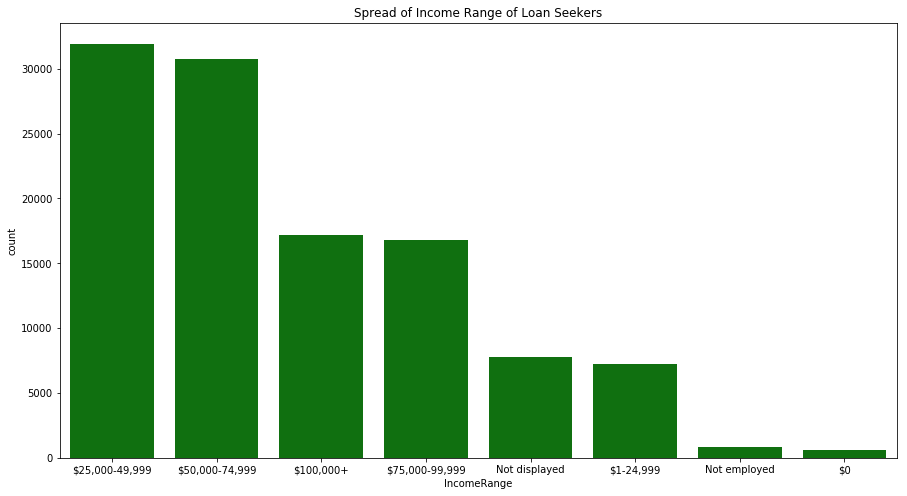

In [6]:
income_freq = loan_sub['IncomeRange'].value_counts(ascending=False)

income_order = income_freq.index

plt.figure(figsize=(15,8))
plt.title('Spread of Income Range of Loan Seekers')
sb.countplot(data=loan_sub, x='IncomeRange', color='g', order=income_order);

## (Visualization 2)

The loan original amount plotted against the borrower APR and the borrower rate have similar plots. They bot have a negative regression, meaning that the higher the loan amount, the lower the rates and APR. This may be a strategy of the loan company to make people get more money rather than getting a loan for a smaller amount and paying higher rates.

(-0.025036054324454965, 0.52253605432445505)

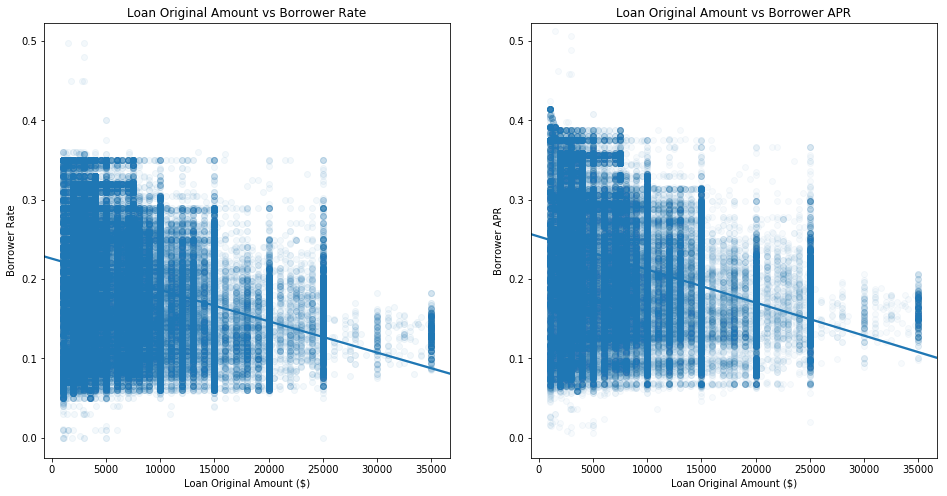

In [11]:
plt.figure(figsize = [16, 8])
base_color = sb.color_palette()[0]

plt.subplot(1, 2, 1)
plt.title('Loan Original Amount vs Borrower Rate')
ax1 = sb.regplot(data = loan_sub , x = 'LoanOriginalAmount', y = 'BorrowerRate', truncate=False, x_jitter=0.3, scatter_kws={'alpha':1/20});
plt.xlabel('Loan Original Amount ($)')
plt.ylabel('Borrower Rate');

plt.subplot(1, 2, 2)
plt.title('Loan Original Amount vs Borrower APR')
sb.regplot(data = loan_sub , x = 'LoanOriginalAmount', y = 'BorrowerAPR', truncate=False, x_jitter=0.3, scatter_kws={'alpha':1/30});
plt.xlabel('Loan Original Amount ($)')
plt.ylabel('Borrower APR')
plt.ylim(ax1.get_ylim()) # set y-axis limits to be same as left plot;

## (Visualization 3)

This map is a final check on the overall correlation of all the quantitative variables used for the analysis.
The features identidfied which streghtened each other the most were Borrowerrate and BorrowerAPR which are quite similar, so that wasn't a surprise. LaonOriginalAmount and MonthlyLoanPayment closely followed behind as the higher the original amount tallies with the higher MonthlyLoanPayment. ProsperScore against both BorowerRate and BorrowerAPR had a fair bit of negative correlation implying that for high prosper scores which meant the loanee had lower risk their rates were lower and vice versa.

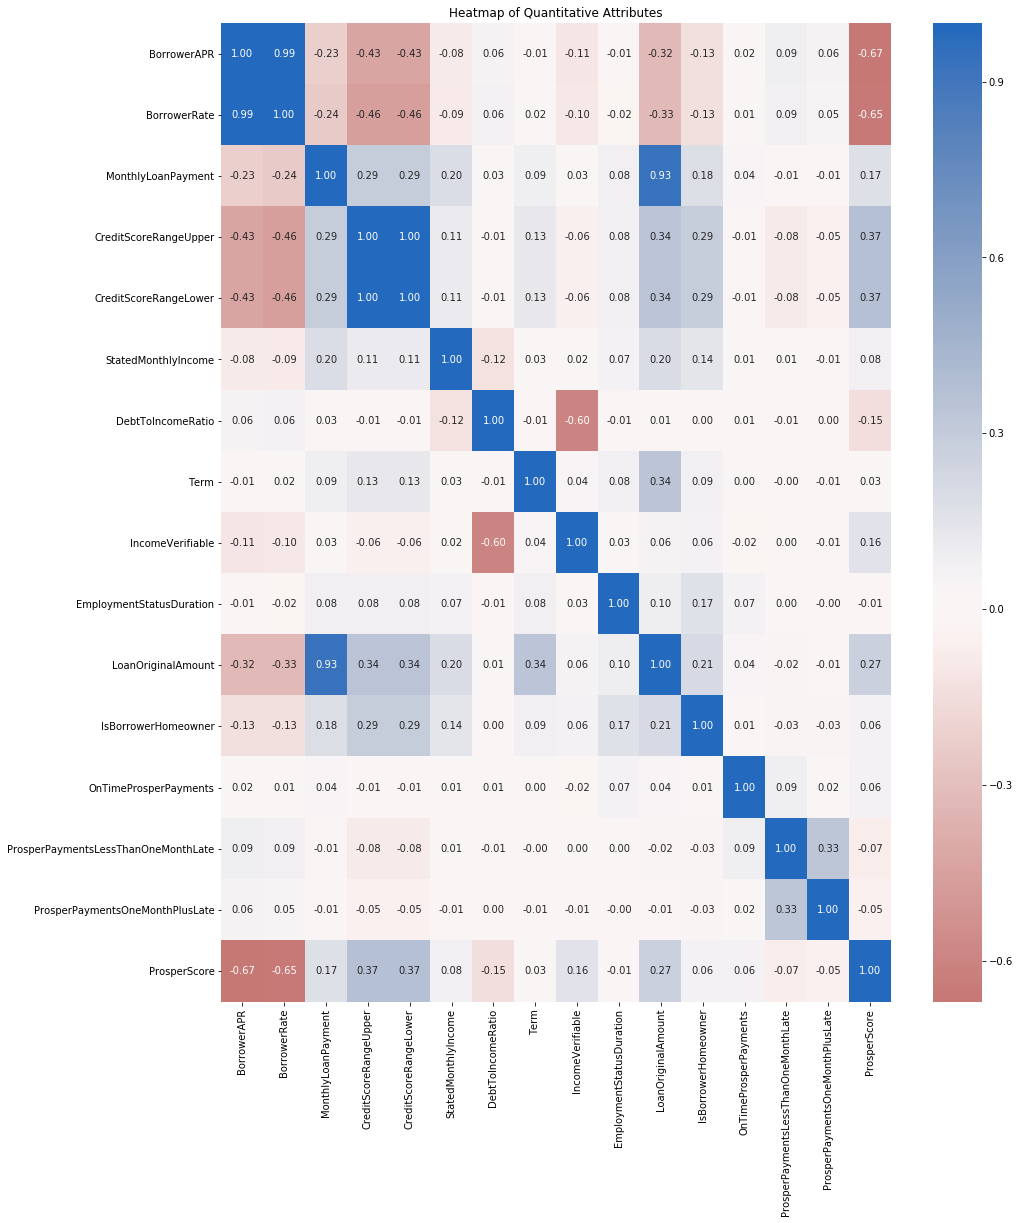

In [13]:
# correlations
plt.figure(figsize = [15, 18])
plt.title('Heatmap of Quantitative Attributes')
sb.heatmap(loan_sub[['BorrowerAPR', 'BorrowerRate', 'MonthlyLoanPayment', 'CreditScoreRangeUpper', 
               'CreditScoreRangeLower', 'StatedMonthlyIncome', 'DebtToIncomeRatio', 'Term', 
               'IncomeVerifiable','EmploymentStatusDuration', 'LoanOriginalAmount', 
               'IsBorrowerHomeowner', 'OnTimeProsperPayments', 'ProsperPaymentsLessThanOneMonthLate', 'ProsperPaymentsOneMonthPlusLate',
              'LoanOriginationDate', 'ProsperScore']]
           .corr(), annot = True, fmt = '.2f',
           cmap = 'vlag_r', center = 0)
plt.show()

### Generate Slideshow
Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show.  

In [ ]:
# Use this command if you are running this file in local
!jupyter nbconvert Part_II_slide_deck_template.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Part_II_slide_deck_template.ipynb to slides
[NbConvertApp] Writing 761932 bytes to Part_II_slide_deck_template.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/Part_II_slide_deck_template.slides.html
Use Control-C to stop this server
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: x-www-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: firefox: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: iceweasel: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: seamonkey: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: mozilla: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: epiphany: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: konqueror: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: chromium-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: google-chrome: not found
/usr/bin/xdg-open: 778: /usr/bin/

> In the classroom workspace, the generated HTML slideshow will be placed in the home folder. 

> In local machines, the command above should open a tab in your web browser where you can scroll through your presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent slide. Make sure you remove all of the quote-formatted guide notes like this one before you finish your presentation! At last, you can stop the Kernel. 

### Submission
If you are using classroom workspace, you can choose from the following two ways of submission:

1. **Submit from the workspace**. Make sure you have removed the example project from the /home/workspace directory. You must submit the following files:
   - Part_I_notebook.ipynb
   - Part_I_notebook.html or pdf
   - Part_II_notebook.ipynb
   - Part_I_slides.html
   - README.md
   - dataset (optional)


2. **Submit a zip file on the last page of this project lesson**. In this case, open the Jupyter terminal and run the command below to generate a ZIP file. 
```bash
zip -r my_project.zip .
```
The command abobve will ZIP every file present in your /home/workspace directory. Next, you can download the zip to your local, and follow the instructions on the last page of this project lesson.
